# Using Descriptive Statitics with Python and Pandas.

- In this notebook we are going to calculate the mean, Variance and standard deviation, CoVariance and Correlation and we are going to see it through some data visualizations to understand more in deep what we are doing.

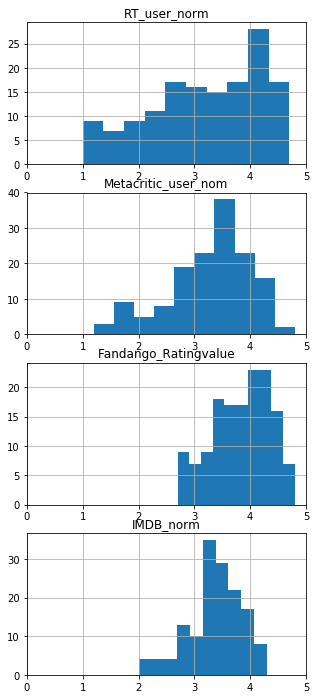

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
movie_reviews = pd.read_csv("https://raw.githubusercontent.com/fivethirtyeight/data/master/fandango/fandango_score_comparison.csv")

scores = ["RT_user_norm", "Metacritic_user_nom", "Fandango_Ratingvalue", "IMDB_norm"]

fig = plt.figure(figsize=(5, 12))
for i, sc in enumerate(scores):
    fig.add_subplot(4, 1, i+1)
    ax = movie_reviews[sc].plot(kind='hist')
    ax.set_xlim([0, 5])
    ax.set_ylabel('')
    ax.set_title(sc)
    ax.grid()
   
plt.show()


# Mean

- let's calculate some statistical measures to see how the properties the histograms suggested are reflected in numerical values.

In [17]:
def calc_mean(data):
    mean = data.mean()
    return mean

sel_cols = ['RT_user_norm', 'Metacritic_user_nom', 'Fandango_Ratingvalue', 'IMDB_norm']

user_review = movie_reviews[sel_cols]

rt_mean, mc_mean, fg_mean, id_mean = user_review.apply(calc_mean)

print(rt_mean)

3.19383561644


In [18]:
print(mc_mean)

3.2595890411


In [19]:
print(fg_mean, id_mean)

3.84520547945 3.36849315068


# Variance And Standard Deviation


- It seems like the Fandango user reviews have the highest mean and skew the most towards to the higher end compared to the other review sites. Let's now calculate variance and standard deviation to better understand the spreads.

In [22]:

def calc_mean(series):
    vals = series.values
    mean = sum(vals) / len(vals)
    return mean

def calc_variance(series):
    mean = calc_mean(series)
    variance = [ (x - mean) **2 for x in series]
    variance = sum(variance) / len(variance)
    return variance

def calc_stdev(series):
    variance = calc_variance(series)
    return variance ** (1/2)

rt_var, mc_var, fg_var, id_var = user_review.apply(calc_variance)
rt_stdev, mc_stdev, fg_stdev, id_stdev = user_review.apply(calc_stdev)


In [24]:
print(rt_var, mc_var, fg_var, id_var)

0.995578438731 0.566654625633 0.251107149559 0.228219647213


In [25]:
print(rt_stdev, mc_stdev, fg_stdev, id_stdev)

0.997786770173 0.752764654878 0.501105926486 0.47772340032


# Scatter Plots

- Let's now explore if Fandango's user ratings are at least relatively correct. More precisely, are movies that are highly rated on Rotten Tomatoes, IMDB, and Metacritic also highly rated on Fandango?

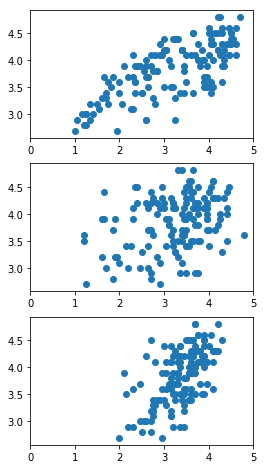

In [26]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (4, 8))
scores = ["RT_user_norm", "Metacritic_user_nom", "IMDB_norm", "Fandango_Ratingvalue"]
for i in range(0,3):
    fig.add_subplot(3, 1, i+1)
    ax = plt.scatter(movie_reviews[scores[i]], movie_reviews[scores[3]])    
    plt.xlim(0.0, 5.0)
    
plt.show()

# COVariance

- It seems like Rotten Tomatoes and IMDB user reviews correlate the most with Fandango user reviews while Metacritic only weakly correlates. 

- Let's write a function that to calculates the covariance values in this screen and a function to calculate the correlation values in the next screen.

Here's the formula for computing the covariance between 2 variables: cov(x,y)=∑(xi−x¯)(yi−y¯)/n.

In [27]:
def calc_covariance(x, y):
    x_mean = calc_mean(x)
    y_mean = calc_mean(y)
    
    x_diff = [nx - x_mean for nx in x]
    y_diff = [ny - y_mean for ny in y]
    
    xy_mult = [ (x_diff[i] * y_diff[i]) for i in range(0,len(x_diff))]
    
    covariance = sum(xy_mult) / len(x)
    
    return covariance

scores = ["RT_user_norm", "Metacritic_user_nom", "IMDB_norm", "Fandango_Ratingvalue"]

rt_fg_covar = calc_covariance(movie_reviews[scores[0]], movie_reviews[scores[3]]) 
mc_fg_covar = calc_covariance(movie_reviews[scores[1]], movie_reviews[scores[3]]) 
id_fg_covar = calc_covariance(movie_reviews[scores[2]], movie_reviews[scores[3]]) 


In [28]:
print(rt_fg_covar, mc_fg_covar, id_fg_covar)

0.362162225558 0.127100769375 0.143718802777


# Correlation

- Interestingly, Rotten Tomatoes covaries strongly with Fandango (0.36) compared to Metacritic (0.13) and IMDB (0.14). 
- Let's calculate the correlation values by using the calc_covariance a function from the previous step.

- Here's the full formula for correlation:

 cov(x,y)/σxσy.

 where cov is shorthand for the covariance function, and σ represents the standard deviation.

In [29]:
def calc_correlation(x, y):
    covariance = calc_covariance(x, y)
    correlation = covariance / ((calc_variance(x) ** (1/2)) * (calc_variance(y) ** (1/2)))
    
    return correlation


rt_fg_corr = calc_correlation(movie_reviews["RT_user_norm"], movie_reviews["Fandango_Ratingvalue"])
mc_fg_corr = calc_correlation(movie_reviews["Metacritic_user_nom"], movie_reviews["Fandango_Ratingvalue"])
id_fg_corr = calc_correlation(movie_reviews["IMDB_norm"], movie_reviews["Fandango_Ratingvalue"])

In [30]:
print(rt_fg_corr, mc_fg_corr, id_fg_corr)

0.724328994249 0.336945314265 0.600354177263


- As the scatter plots suggested, Rotten Tomatoes and IMDB correlate the strongest with Fandango, with correlation values of 0.72 and 0.60 respectively. Metacritic, on the other hand, only has a correlation value of 0.34 with Fandango.
- While covariance and correlation values may seem complicated to compute and hard to reason with, their best use case is in comparing relationships like we did in this challenge.